In [46]:
import subprocess

import numpy as np

In [51]:
n_tasks = 100
n_members = 20
t = np.random.randint(1, 100, (n_members, n_tasks))
for i in range(n_members):
    t[i] *= (5 + i)
t[:] //= 20
t

array([[ 21,   4,  18, ...,  23,   9,   4],
       [  0,  12,  18, ...,  16,  28,   8],
       [ 18,   1,   3, ...,  30,  27,   4],
       ...,
       [ 73,  19,  14, ...,  39,   2,  93],
       [ 25,  97, 106, ...,  46,  44,  16],
       [ 21,  97,  76, ...,  80,   8,  61]])

In [52]:
n = n_tasks * n_members + 2
m = n_tasks + n_members + 1
with open("in2.txt", "w") as f:
    print(m, n, file=f)
    c = np.zeros(n_tasks * n_members, dtype=np.int32)
    print(*c, -1, 10000, file=f)
    for i in range(n_members):
        c = np.zeros(n_tasks * n_members, dtype=np.int32)
        c[i*n_tasks:(i+1)*n_tasks] = t[i]
        print(*c, -1, 0, 0, file=f)
    for i in range(n_tasks):
        c = np.zeros(n_tasks * n_members, dtype=np.int32)
        c[i::n_tasks] = -1
        print(*c, 0, 1, 0, file=f)
    c = np.zeros(n_tasks * n_members, dtype=np.int32)
    print(*c, 0, 1, 1, file=f)

In [189]:
%%time
subprocess.run("./a.out < in2.txt > out2.txt", shell=True)
subprocess.run("./a.out < in2.txt > out2.txt", shell=True)
subprocess.run("./a.out < in2.txt > out2.txt", shell=True)
subprocess.run("./a.out < in2.txt > out2.txt", shell=True)
subprocess.run("./a.out < in2.txt > out2.txt", shell=True)

CPU times: user 0 ns, sys: 11.4 ms, total: 11.4 ms
Wall time: 1.18 s


CompletedProcess(args='./a.out < in2.txt > out2.txt', returncode=0)

In [181]:
res = !cat out2.txt
res = list(map(float, res[1].split()))

In [182]:
X, target, v = res[:-2], res[-2], res[-1]
target, v

(12.3043, 1.0)

In [183]:
X = np.array(X).reshape(n_members, n_tasks)

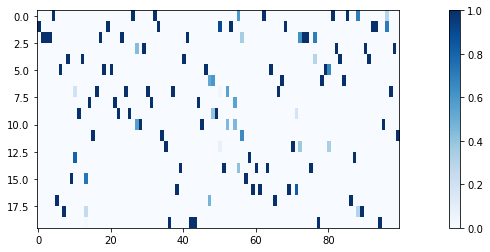

In [184]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 4))
plt.imshow(X, aspect=3, cmap="Blues")
plt.colorbar()
plt.show()

In [185]:
X.sum(0)

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.9999997 , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.00000041, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [186]:
(X * t).sum(1)

array([12.304324  , 12.304324  , 12.30432382, 12.304322  , 12.304323  ,
       12.304325  , 12.304324  , 12.304318  , 12.304326  , 12.304324  ,
       12.304324  , 12.304324  , 12.3043195 , 12.304328  , 12.30432   ,
       12.30432   , 12.304324  , 12.304322  , 12.304324  , 12.304323  ])